<a href="https://colab.research.google.com/github/derek-byte/Melanoma_Deep_Learning/blob/main/MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MobileNet

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [5]:
def prepare_image(file):
  img_path = PATH = '/content/drive/MyDrive/Melanoma_Dataset/'
  # Resizing image to 224 * 224 and loading it
  img = image.load_img(img_path + file, target_size=(224, 224))
  # Fromat of array
  img_array = image.img_to_array(img)
  # Expand image
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  # # Scaling all RGB values to be from -1 to 1
  return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

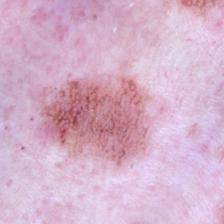

In [7]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/Melanoma_Dataset/test/Melanoma/AUG_0_11.jpeg", width=224, height=224)

In [15]:
preprocessed_image = prepare_image('test/Melanoma/AUG_0_11.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

49152/35363 [=========================================] - 0s 0us/step


[[('n03314780', 'face_powder', 0.39016253),
  ('n03485794', 'handkerchief', 0.09317512),
  ('n02219486', 'ant', 0.084848605),
  ('n03887697', 'paper_towel', 0.051789187),
  ('n07930864', 'cup', 0.029257)]]

PreProcess Data

In [5]:
PATH = '/content/drive/MyDrive/Melanoma_Dataset/'
train_path = PATH + 'train/'
valid_path = PATH + 'valid/'
test_path = PATH + 'test/'

In [7]:
# Director iterators 
# preprocessing_function=tf.keras.applications.mobilenet.preprocess_input   scales the image from 255 to be on a scale from -1 to 1 for RGB values
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 10413 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


Modify Model

In [20]:
mobile = tf.keras.applications.mobilenet.MobileNet()
# model = tf.keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
#     keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
#     keras.layers.Dense(10, activation='softmax') # output layer (3)
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=1)  # we pass the data, labels and epochs and watch the magic!

In [21]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [22]:
# Get the last 6 layer modules in Keras
# x = mobile.layers[-5].output
x = mobile.layers[-2].output
# Using functional model type and to this output layer, pass all the previous layers from x
# output = Dense(units=7, activation='softmax')(x)
output = Dense(units=2, activation='softmax')(x)

In [23]:
model = Model(inputs=mobile.input, outputs=output)

In [24]:
# Going through all layers in model and saying that all the models except for the last 23 make it not trainable
for layer in model.layers[:-23]:
  layer.trainable = False

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

Train the Model

In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Run for more epochs (~30) to see better results
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
